In [19]:
import numpy as np
import pandas  as pa
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [5]:
faces = fetch_olivetti_faces()

In [6]:
data = faces.data
target = faces.target

In [7]:
faces.images.shape

(400, 64, 64)

In [29]:
data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [8]:
data.shape

(400, 4096)

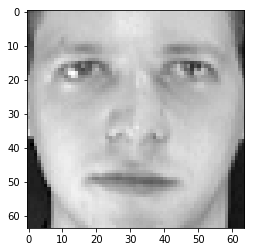

In [10]:
plt.imshow(data[0].reshape(64,64),cmap="gray")

In [ ]:
up_face = (32,64)
bottom_face = (32,64)
#回归模型中样本标签不局限于一列

In [12]:
#拆分，每个人取9张为训练数据
#上半边脸的数据
X_train=[]
#每个人最后一张的上半边脸的数据
X_test = []
#每个人的钱就张的下半边脸的数据
y_train=[]
y_test=[]

index=0
for i in range(40):
    for j in range(10):
        #取出每张照片
        face = data[index]
        index+=1
        up_face=face[:2048]
        bottom_face=face[2048:]
        if j<9:
            #前九张保存于训练集
            X_train.append(up_face)
            y_train.append(bottom_face)
        else:
            X_test.append(up_face)
            y_test.append(bottom_face)

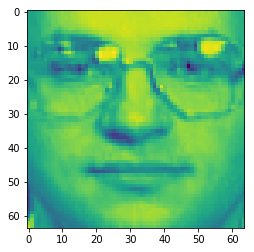

In [14]:
idx = np.random.randint(0,350,size=1)[0]
up_face = X_train[idx]
bottom_face=y_train[idx]
plt.imshow(np.concatenate((up_face,bottom_face)).reshape(64,64),cmap='gray')

In [20]:
kr = KNeighborsRegressor()
line = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [21]:
kr.fit(X_train,y_train)
line.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
y1 = kr.predict(X_test)
y2 = line.predict(X_test)
y3 = ridge.predict(X_test)
y4 = lasso.predict(X_test)

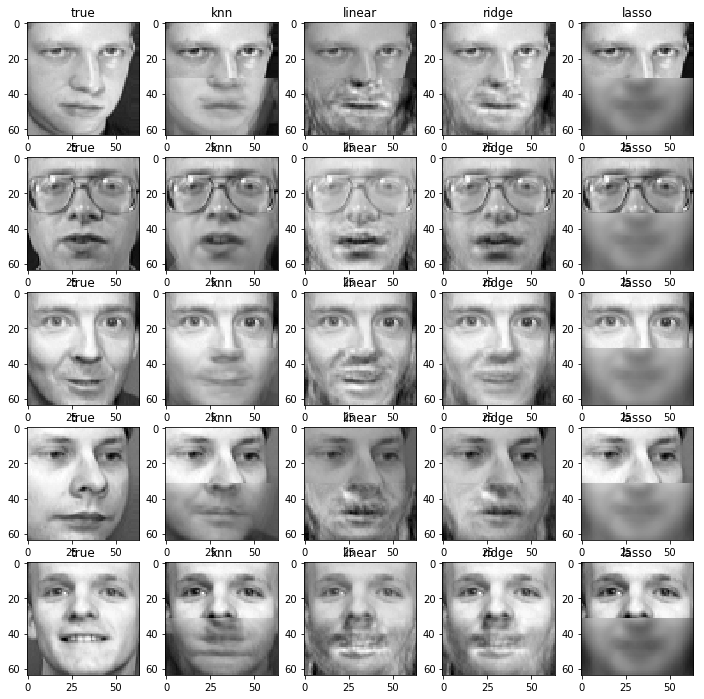

In [26]:
title = ["true","knn","linear","ridge","lasso"]
pre_results = [y_test,y1,y2,y3,y4]

plt.figure(figsize=(12,12))
loc =1
#控制行
for i in range(5):
    #用i控制保证上半边脸是一个数据
    #控制列
    for j in range(5):
        true_up_face = X_test[i]
        #从真实值，4个预测值中，取出下半边脸
        y_ = pre_results[j]
        bottom_face = y_[i]
        
        face =np.concatenate((true_up_face,bottom_face)).reshape(64,64)
        ax = plt.subplot(5,5,loc)
        ax.imshow(face,cmap='gray')
        ax.set_title(title[j])
        loc+=1
        
        